<a href="https://colab.research.google.com/github/ShiningSu0/Validation-Prediction-with-stock-market-back-testing/blob/master/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import ast
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import sys
import matplotlib.gridspec as gridspec
import matplotlib.ticker as ticker
from sklearn import preprocessing
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Activation
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import statsmodels.api as sm
import matplotlib.pyplot as plt
from pandas_datareader import data
from google.colab import drive
drive.mount('/content/gdrive')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Mounted at /content/gdrive


In [ ]:
from sklearn.cluster import KMeans

In [ ]:
kospi=pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/swcon_capstone/kospi_open_close_preprocessed.csv',index_col=0)

In [ ]:
kospi

,2016-01-04,2016-01-05,2016-01-06,2016-01-07,2016-01-08,2016-01-11,2016-01-12,2016-01-13,2016-01-14,2016-01-15,2016-01-18,2016-01-19,2016-01-20,2016-01-21,2016-01-22,2016-01-25,2016-01-26,2016-01-27,2016-01-28,2016-01-29,2016-02-01,2016-02-02,2016-02-03,2016-02-04,2016-02-05,2016-02-11,2016-02-12,2016-02-15,2016-02-16,2016-02-17,2016-02-18,2016-02-19,2016-02-22,2016-02-23,2016-02-24,2016-02-25,2016-02-26,2016-02-29,2016-03-02,2016-03-03,...,2020-08-04,2020-08-05,2020-08-06,2020-08-07,2020-08-10,2020-08-11,2020-08-12,2020-08-13,2020-08-14,2020-08-18,2020-08-19,2020-08-20,2020-08-21,2020-08-24,2020-08-25,2020-08-26,2020-08-27,2020-08-28,2020-08-31,2020-09-01,2020-09-02,2020-09-03,2020-09-04,2020-09-07,2020-09-08,2020-09-09,2020-09-10,2020-09-11,2020-09-14,2020-09-15,2020-09-16,2020-09-17,2020-09-18,2020-09-21,2020-09-22,2020-09-23,2020-09-24,2020-09-25,2020-09-28,2020-09-29
한화생명,100.0,100.554017,100.692521,98.476454,98.476454,95.706371,96.121884,96.398892,93.767313,93.490305,93.628809,95.983380,93.767313,93.351801,95.152355,94.182825,92.797784,96.260388,94.736842,95.983380,96.952909,97.229917,95.706371,95.706371,96.398892,93.767313,94.321330,95.290859,92.936288,94.182825,94.598338,93.767313,93.074792,93.074792,89.196676,88.504155,86.149584,84.764543,85.318560,87.257618,...,20.775623,20.429363,20.637119,20.221607,21.191136,21.814404,22.576177,22.783934,22.368421,20.567867,21.675900,20.637119,20.498615,20.429363,21.952909,21.745152,20.983380,21.121884,21.191136,22.091413,21.814404,21.952909,21.606648,21.952909,22.437673,21.745152,21.675900,21.745152,22.091413,21.814404,21.883657,21.606648,21.675900,21.329640,20.706371,20.706371,19.944598,20.152355,20.498615,21.121884
미래에셋대우,100.0,99.555556,97.333333,92.888889,94.222222,90.111111,89.444444,92.000000,89.000000,85.444444,85.444444,85.555556,82.000000,82.222222,86.444444,86.555556,84.333333,86.111111,86.444444,87.000000,88.888889,86.555556,83.444444,86.888889,88.555556,83.222222,80.555556,84.666667,85.555556,85.111111,86.111111,85.222222,85.666667,85.888889,85.555556,86.000000,86.666667,88.777778,89.333333,90.000000,...,94.888889,99.555556,98.222222,97.888889,105.444444,104.777778,104.222222,105.333333,101.666667,100.222222,103.000000,98.777778,102.555556,103.555556,107.666667,106.222222,104.000000,105.444444,103.333333,106.555556,108.555556,108.000000,105.000000,106.666667,104.888889,101.111111,101.333333,103.888889,103.666667,103.111111,102.000000,101.333333,102.222222,98.555556,94.555556,96.666667,93.000000,92.777778,93.666667,94.222222
기업은행,100.0,102.904564,101.659751,99.170124,99.170124,97.510373,95.435685,95.850622,95.435685,91.286307,92.531120,91.286307,88.796680,89.211618,90.871369,92.531120,90.041494,93.360996,95.020747,95.435685,96.265560,94.605809,91.286307,92.531120,97.510373,94.190871,92.116183,97.510373,97.925311,101.244813,100.000000,98.340249,97.925311,97.925311,97.510373,97.925311,97.925311,96.680498,98.340249,98.755187,...,68.049793,67.717842,68.796680,68.298755,69.709544,72.033195,73.029046,73.195021,72.199170,68.879668,69.626556,67.385892,67.966805,68.713693,69.875519,69.294606,68.215768,68.547718,67.136929,67.800830,68.215768,68.796680,68.049793,68.630705,68.298755,67.468880,68.049793,67.883817,68.049793,67.800830,67.634855,67.385892,66.390041,66.390041,65.394191,65.643154,64.647303,65.145228,65.643154,66.473029
SK하이닉스,100.0,101.492537,101.990050,100.165837,98.507463,95.024876,92.205638,93.200663,92.537313,88.888889,88.557214,93.864013,88.888889,88.225539,90.049751,92.868988,92.371476,91.708126,91.708126,90.547264,94.195688,94.361526,91.044776,93.200663,93.200663,90.049751,90.713101,91.873964,95.854063,99.668325,100.165837,98.175788,99.170813,100.829187,102.487562,102.155887,102.155887,99.502488,102.653400,105.970149,...,270.646766,267.661692,268.988391,267.330017,269.983416,269.651741,268.656716,267.661692,266.003317,259.038143,248.756219,238.142620,247.097844,250.414594,255.389718,261.359867,262.354892,258.043118,249.087894,249.419569,250.414594,261.028192,261.0

In [ ]:
kospi=kospi.fillna(kospi.mean())

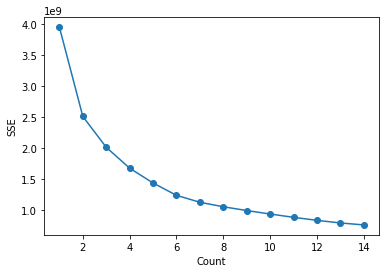

In [ ]:
#model 평가
def elbow(X):
  sse=[]
  for i in range(1,15):
    km = KMeans(n_clusters=i,init='k-means++',random_state=1)
    km.fit(X)
    sse.append(km.inertia_)

  plt.plot(range(1,15),sse,marker='o')
  plt.xlabel('Count')
  plt.ylabel('SSE')
  plt.show()

elbow(kospi)

In [ ]:
model=KMeans(n_clusters=3,random_state=1)
model.fit(kospi)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1, tol=0.0001, verbose=0)

In [ ]:
print(model.labels_)

[0 0 0 1 0 0 2 0 0 2 0 2 0 0 0 0 2 2 0 0 0 0 0 0 2 0 2 0 2 2 0 0 2 0 0 0 0
 0 0 0 2 2 2 0 2 2 0 2 2 2 0 0 0 0 2 0 2 2 0 0 0 0 2 0 0 0 2 0 2 2 2 0 0 0
 2 2 0 2 2 0 0 0 2 2 0 2 0 0 2 0 2 0 0 0 0 0 2 0 0 0 2 2 2 0 0 0 0 2 2 0 0
 0 0 2 0 0 0 1 0 2 0 0 2 2 2 0 0 0 0 0 2 0 0 2 0 0 0 0 0 2 2 0 0 2 0 2 0 2
 0 0 2 0 0 0 1 0 2 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 2 2
 0 0 0 0 0 0 2 2 0 2 0 0 0 2 0 0 0 0 2 0 0 0 2 0 2 2 2 0 2 0 2 0 0 0 0 0 0
 0 0 2 0 0 0 0 0 0 0 1 0 0 2 1 0 0 0 0 0 2 0 0 2 0 2 0 0 2 0 0 0 0 1 2 0 0
 2 2 0 0 2 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 2 0 0 0 2 0 2 2 0 0 0 1 0 0 0 0 0
 0 0 2 2 2 0 0 0 2 0 2 0 0 0 2 0 2 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 2 0 0 1 2 0 0 1 1 2 0 0 2 0 0 2 0 2 2 3 0 2 0 2 2 0 0 0 0 2 1 1 2 0 0 0 0
 2 0 2 0 0 2 2 0 0 0 2 2 0 0 0 0 0 0 0 0 1 0 0 0 2 0 2 0 0 2 2 0 0 2 0 0 0
 0 0 2 0 0 2 0 0 0 2 0 1 0 1 1 0 0 0 0 0 2 0 0 0 0 1 0 0 0 0 0 0 0 0 2 0 0
 2 0 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 2 0 0 0 0 0 0 0 0 0 2 0 2 0 2 0 0 2 0
 0 0 0 2 0 2 2 1 2 2 2 0 

In [ ]:
kospi['Cluster']=model.labels_

In [ ]:
kospi.to_csv('/content/gdrive/My Drive/Colab Notebooks/swcon_capstone/kospi_cluster.csv')

## Cluster 평가


In [ ]:
cluster=pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/swcon_capstone/kospi_cluster_dbc_analysis.csv',encoding='cp949',index_col=0)

In [ ]:
cluster

,Cluster,업종,2016-01-04,2016-01-05,2016-01-06,2016-01-07,2016-01-08,2016-01-11,2016-01-12,2016-01-13,2016-01-14,2016-01-15,2016-01-18,2016-01-19,2016-01-20,2016-01-21,2016-01-22,2016-01-25,2016-01-26,2016-01-27,2016-01-28,2016-01-29,2016-02-01,2016-02-02,2016-02-03,2016-02-04,2016-02-05,2016-02-11,2016-02-12,2016-02-15,2016-02-16,2016-02-17,2016-02-18,2016-02-19,2016-02-22,2016-02-23,2016-02-24,2016-02-25,2016-02-26,2016-02-29,...,2020-08-04,2020-08-05,2020-08-06,2020-08-07,2020-08-10,2020-08-11,2020-08-12,2020-08-13,2020-08-14,2020-08-18,2020-08-19,2020-08-20,2020-08-21,2020-08-24,2020-08-25,2020-08-26,2020-08-27,2020-08-28,2020-08-31,2020-09-01,2020-09-02,2020-09-03,2020-09-04,2020-09-07,2020-09-08,2020-09-09,2020-09-10,2020-09-11,2020-09-14,2020-09-15,2020-09-16,2020-09-17,2020-09-18,2020-09-21,2020-09-22,2020-09-23,2020-09-24,2020-09-25,2020-09-28,2020-09-29
SK하이닉스,0,반도체 제조업,0.055521,0.061199,0.063091,0.056151,0.049842,0.036593,0.025868,0.029653,0.027129,0.013249,0.011987,0.032177,0.013249,0.010726,0.017666,0.028391,0.026498,0.023975,0.023975,0.019558,0.033438,0.034069,0.021451,0.029653,0.029653,0.017666,0.020189,0.024606,0.039748,0.054259,0.056151,0.048580,0.052366,0.058675,0.064984,0.063722,0.063722,0.053628,...,0.704732,0.693375,0.698423,0.692114,0.702208,0.700946,0.697161,0.693375,0.687066,0.660568,0.621451,0.581073,0.615142,0.627760,0.646688,0.669401,0.673186,0.656782,0.622713,0.623975,0.627760,0.668139,0.668139,0.664353,0.676972,0.650473,0.641640,0.664353,0.684543,0.708517,0.703470,0.712303,0.731230,0.741325,0.700946,0.729968,0.738801,0.721136,0.716088,0.735016
LG유플러스,0,전기 통신업,0.136461,0.125800,0.131130,0.141791,0.141791,0.120469,0.115139,0.113006,0.102345,0.105544,0.100213,0.072495,0.030917,0.020256,0.025586,0.042644,0.035181,0.043710,0.031983,0.081023,0.069296,0.040512,0.018124,0.034115,0.023454,0.000000,0.028785,0.043710,0.047974,0.076759,0.097015,0.091684,0.125800,0.115139,0.125800,0.141791,0.141791,0.184435,...,0.264392,0.259062,0.275053,0.285714,0.349680,0.317697,0.371002,0.360341,0.360341,0.301706,0.312367,0.275053,0.312367,0.328358,0.371002,0.365672,0.339019,0.344350,0.323028,0.333689,0.339019,0.328358,0.307036,0.317697,0.328358,0.312367,0.317697,0.317697,0.339019,0.323028,0.312367,0.312367,0.296375,0.275053,0.259062,0.253731,0.221748,0.200426,0.237740,0.275053
KB금융,0,기타 금융업,0.150411,0.155112,0.150411,0.141011,0.142186,0.130435,0.131610,0.146886,0.116334,0.092832,0.096357,0.077556,0.052879,0.055229,0.071680,0.084606,0.069330,0.086957,0.099882,0.105758,0.090482,0.077556,0.056404,0.062280,0.077556,0.062280,0.055229,0.084606,0.081081,0.123384,0.108108,0.099882,0.095182,0.095182,0.098707,0.089307,0.092832,0.085781,...,0.222092,0.222092,0.246769,0.237368,0.260870,0.299647,0.336075,0.363102,0.323149,0.284371,0.280846,0.244418,0.251469,0.256169,0.279671,0.259694,0.256169,0.280846,0.253819,0.266745,0.273796,0.266745,0.256169,0.286722,0.276146,0.269095,0.270270,0.260870,0.287897,0.289072,0.278496,0.279671,0.274971,0.272620,0.267920,0.270270,0.262045,0.285546,0.285546,0.270270
NH투자증권,0,금융 지원 서비스업,0.305400,0.309125,0.283985,0.256983,0.267225,0.247672,0.233706,0.275605,0.254190,0.236499,0.229981,0.232775,0.203911,0.201117,0.241155,0.245810,0.244879,0.271881,0.297020,0.297020,0.315642,0.322160,0.287709,0.300745,0.316574,0.273743,0.233706,0.266294,0.277467,0.266294,0.284916,0.279330,0.279330,0.291434,0.293296,0.299814,0.305400,0.323091,...,0.261639,0.265363,0.280261,0.261639,0.295158,0.300745,0.320298,0.318436,0.298883,0.276536,0.287709,0.250466,0.254190,0.248603,0.286778,0.272812,0.254190,0.268156,0.246741,0.260708,0.292365,0.291434,0.272812,0.286778,0.281192,0.268156,0.276536,0.275605,0.284916,0.294227,0.299814,0.280261,0.280261,0.269088,0.254190,0.256052,0.244879,0.256983,0.257914,0.263501
하나금융지주,0,기타 금융업,0.120108,0.129555,0.130904,0.113360,0.118758,0.097166,0.098516,0.099865,0.097166,0.062078,0.067476,0.062078,0.032389,0.043185,0.053981,0.062078,0.040486,0.053981,0.071525,0.079622,0.071525,0.070175,0.053981,0.070175,0.1

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
sector=cluster.groupby('Cluster').cluster.sum()
sector

AttributeError: ignored

In [ ]:
#http://blog.naver.com/PostView.nhn?blogId=samsjang&logNo=221017639342&categoryNo=0&parentCategoryNo=0&viewDate=&currentPage=1&postListTopCurrentPage=1&from=postView